# Examples for what you might do in your assignment

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# I would encourge you to explore what scipy can do.
from scipy.stats import ttest_ind, ttest_rel, mannwhitneyu

# a package that can be used for ploting nice correlation matrix
import pingouin as pg 

# for regression
import statsmodels.api as sm
from patsy import dmatrices

## Generating a dataset by using random numbers. What exactly does this cell do?

In [3]:
data = np.random.randint(1, 500, size= [600, 6])
df = pd.DataFrame(data, columns=['col1', 'col2', 'col3', 'col4', 'col5', 'col_dummy'])

col5_ops = lambda x: x + 100 - np.random.randint(10, 30)
df['col5'] = df['col4'].apply(col5_ops)

for i in range(df.shape[0]):
    prob = 0.75
    if df['col1'][i] >= df['col1'].median():
        df['col_dummy'][i] = np.random.choice([1, 0], p = [prob, 1-prob])
    else:
        df['col_dummy'][i] = np.random.choice([1, 0], p = [1-prob, prob])


df.head(10)

,col1,col2,col3,col4,col5,col_dummy
0,486,72,109,434,513,1
1,168,499,358,277,366,0
2,14,476,267,370,451,0
3,361,319,463,489,566,1
4,296,243,330,255,335,1
5,129,454,289,173,249,0
6,108,148,103,405,487,0
7,345,406,51,454,536,1
8,470,190,70,197,287,0
9,242,448,33,445,520,1


In [4]:
df['col_dummy'].unique()

array([1, 0])

### correlation matrix using pandas

In [5]:
df.corr()


,col1,col2,col3,col4,col5,col_dummy
col1,1.000000,-0.087209,-0.069842,-0.061211,-0.058828,0.415523
col2,-0.087209,1.000000,0.010233,-0.033416,-0.032471,-0.069044
col3,-0.069842,0.010233,1.000000,0.059650,0.057734,-0.036202
col4,-0.061211,-0.033416,0.059650,1.000000,0.999239,0.006049
col5,-0.058828,-0.032471,0.057734,0.999239,1.000000,0.007812
col_dummy,0.415523,-0.069044,-0.036202,0.006049,0.007812,1.000000


### correlation matrix using pingouin

In [6]:
df.rcorr()

# why is it NOT appropriate to use pearson's correlation to analyse the association 
# between the dummy and continuous variables?

,col1,col2,col3,col4,col5,col_dummy
col1,-,*,,,,***
col2,-0.087,-,,,,
col3,-0.07,0.01,-,,,
col4,-0.061,-0.033,0.06,-,***,
col5,-0.059,-0.032,0.058,0.999,-,
col_dummy,0.416,-0.069,-0.036,0.006,0.008,-


### What kind of correlation were excuted? (Pearson? Spearman?)

### t tests (indepent and paried)

In [7]:
print(ttest_ind(df['col1'], df['col2']))
print(ttest_rel(df['col1'], df['col2']))

# What do they do and what are the differences between them?

Ttest_indResult(statistic=-0.31106360933258165, pvalue=0.75580638104009)
Ttest_relResult(statistic=-0.2983277621225126, pvalue=0.7655564723048958)


### How do you apply the mannwhitneyu function that has already been imported?

In [8]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html

# It is vital that you choose the correct methods in analyses!!!

In [9]:
# You might find this paper useful:

# Khamis, H. (2008). Measures of association: how to choose?. 
# Journal of Diagnostic Medical Sonography, 24(3), 155-162.

# https://journals.sagepub.com/doi/abs/10.1177/8756479308317006


# You analyses will be invalid and misleading if incorrect methods were adopted

# Plotting

### Examples of scatter plot

<AxesSubplot:xlabel='col4', ylabel='col3'>

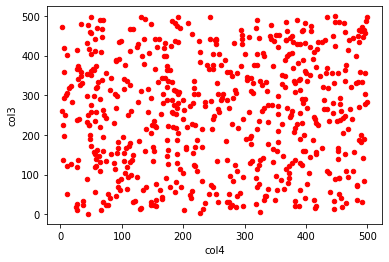

In [10]:
# pandas; scatter plot
df.plot.scatter(x='col4', y='col3', c='red')

<AxesSubplot:xlabel='col5', ylabel='col4'>

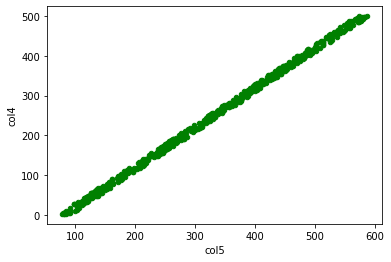

In [11]:
# pandas; scatter plot
df.plot.scatter(x='col5', y='col4', c='green')

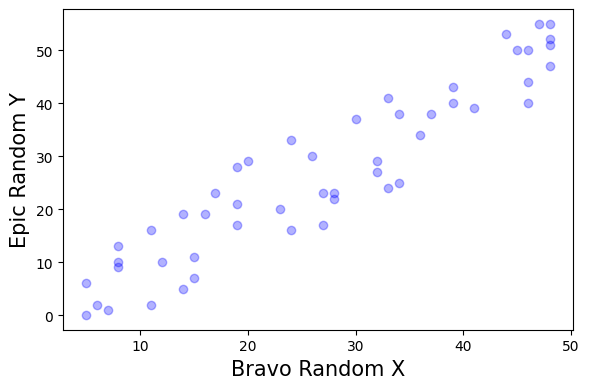

In [12]:
# using matplotlib for unlimited possibilities

fig, ax = plt.subplots(dpi=100)

# x = df['col4']
# y = df['col5']

x = list(np.random.randint(5,50) for i in range(50))
y = []
for i in x:
    y.append(i + np.random.randint(-10,10))

ax.scatter(x, y, c='blue', alpha=0.3)

label_size = 15
ax.set_xlabel('Bravo Random X', size = label_size)
ax.set_ylabel('Epic Random Y', size = label_size)

plt.tight_layout()

plt.show()

### pandas plotting; histogram by the values of a column

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

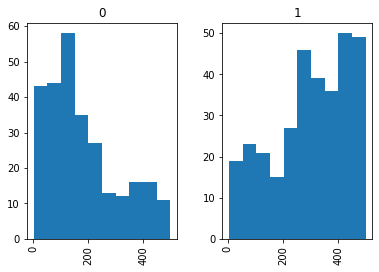

In [13]:
df['col1'].hist(by=df['col_dummy'])


### What if you want to make box plots?

In [14]:
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.boxplot.html
# https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.boxplot.html

### What about density plots?

In [15]:
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.density.html
# https://seaborn.pydata.org/generated/seaborn.distplot.html

# And you should explore more analysis methods, as well as plotting.

# Regression Analysis

In [16]:
# liear regression

y, X = dmatrices('col5 ~ col1 + col2 + col3 + col4 + col_dummy',
                  data=df, return_type='dataframe')

mod = sm.OLS(y, X)   # linear regression with OLS estimation
res = mod.fit()       # Fit model
print(res.summary())   # Summarise model

# what pattern can you expect to see from the analysis?

                            OLS Regression Results                            
Dep. Variable:                   col5   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 7.850e+04
Date:                Fri, 13 May 2022   Prob (F-statistic):               0.00
Time:                        15:15:07   Log-Likelihood:                -1893.2
No. Observations:                 600   AIC:                             3798.
Df Residuals:                     594   BIC:                             3825.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     79.8543      0.884     90.377      0.0

In [17]:
# logistic regression

y, X = dmatrices('col_dummy ~ col1 + col2 + col3 + col4 + col5',
                  data=df, return_type='dataframe')

mod = sm.Logit(y, X)    # Describe model; logistic regression
res = mod.fit()       # Fit model
print(res.summary())   # Summarise model

# what pattern can you expect to see from the analysis?

Optimization terminated successfully.
         Current function value: 0.596834
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:              col_dummy   No. Observations:                  600
Model:                          Logit   Df Residuals:                      594
Method:                           MLE   Df Model:                            5
Date:                Fri, 13 May 2022   Pseudo R-squ.:                  0.1346
Time:                        15:15:07   Log-Likelihood:                -358.10
converged:                       True   LL-Null:                       -413.80
Covariance Type:            nonrobust   LLR p-value:                 2.069e-22
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.9704      1.313     -1.501      0.133      -4.543       0.602
col1           0.0063      0.

# Decision Tree

In [19]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [28]:
feature_cols = ['col1', 'col2', 'col3']
X = df[feature_cols] # Features
y = df['col_dummy'] # Target variable

In [29]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [30]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)


In [31]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.6111111111111112


In [32]:
from sklearn.tree import export_graphviz
from six import StringIO
# from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

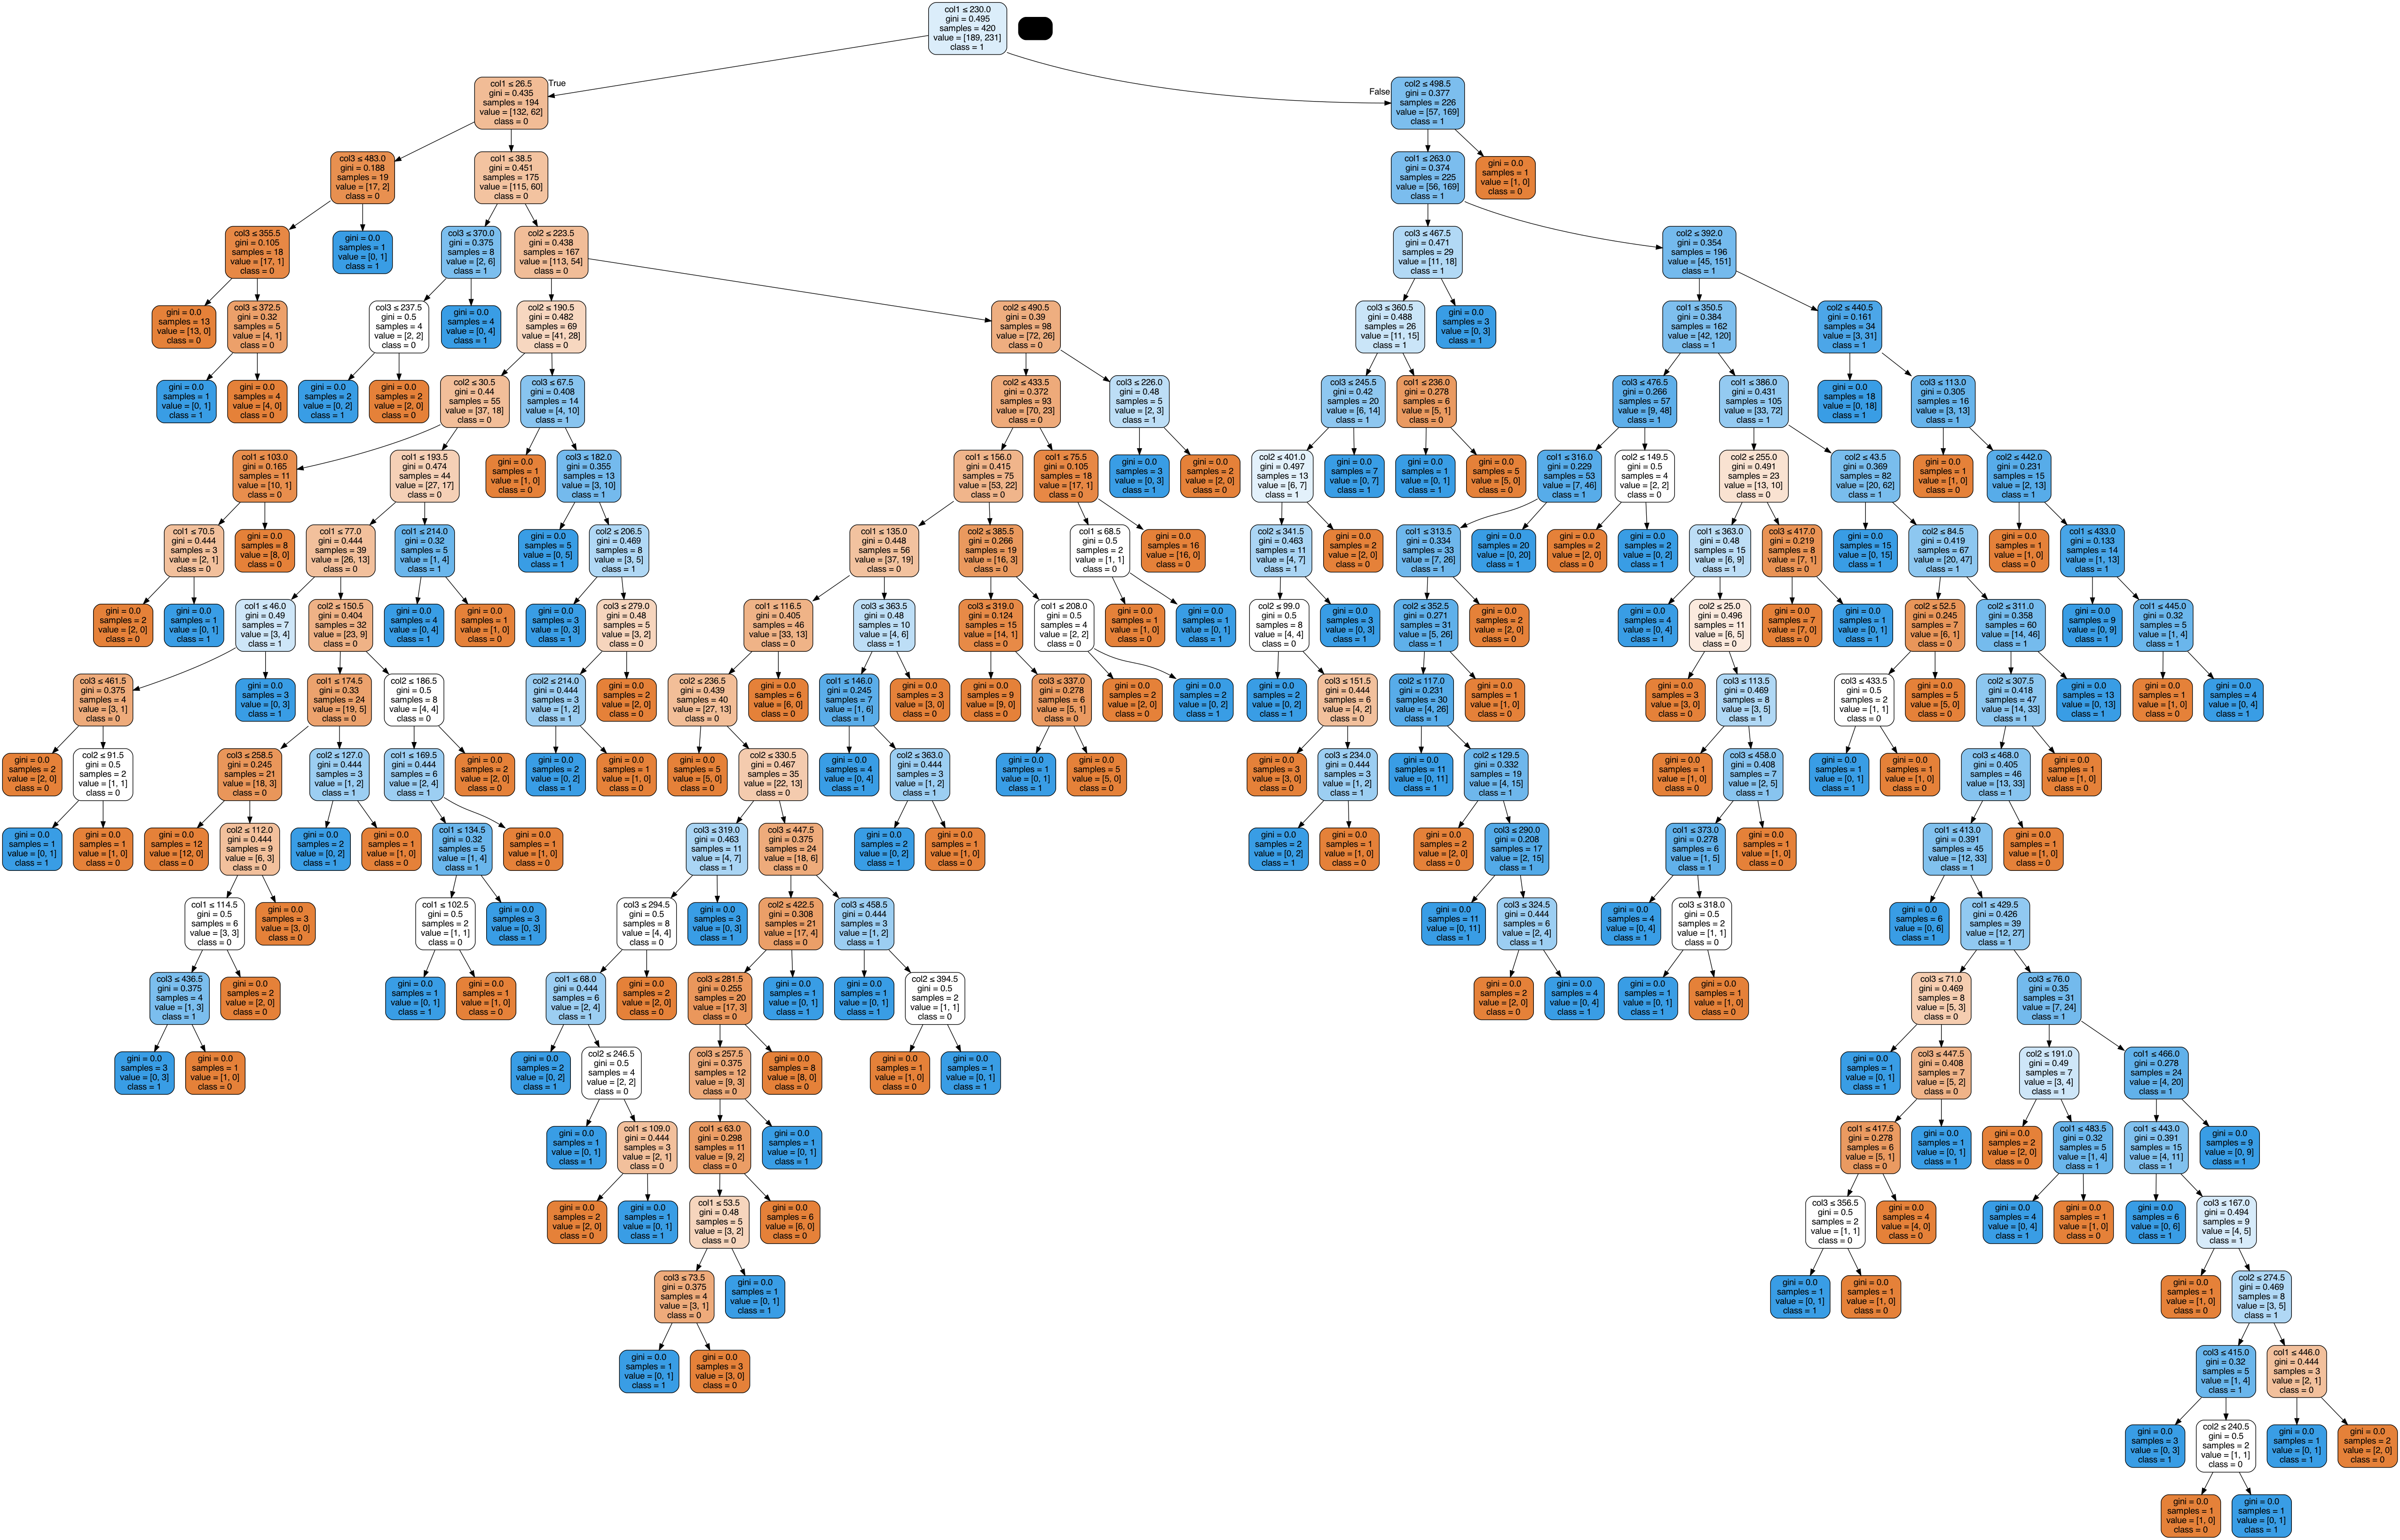

In [35]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())